# Lectura del archivo e importacion de bibliotecas necesarias

## Tambien se realiza preparacion general de los datos.

In [ ]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
from math import factorial
import scipy.stats as st 
import math 
import datetime as dt
import scipy.stats as stats
import dash
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output
from sqlalchemy import create_engine

events = pd.read_csv('logs_exp_us.csv', sep="\t")

events.columns = ['event_name', 'user_id', 'time', 'group'] # Nombramos las columnas a comodidad

events['time'] = pd.to_datetime(events['time'], unit='s') # Se convierte la columna al timpo necesario

events['date'] = events['time'].dt.date # Se crea la columna de fecha
events['date'] = pd.to_datetime(events['date']) # Se convierte la columna de fecha al tipo datetime

events['group'] = events['group'].astype(str) # Cambiamos la columna de int a str
events['group'] = events['group'].replace({'246': 'A1', '247': 'A2', '248': 'B'}) # Reemplazamos los calores para no confundirnos

events['user_id'] = events['user_id'].astype(str) # Cambiamos los user id a str

events.head(10)

,event_name,user_id,time,group,date
0,MainScreenAppear,4575588528974610257,2019-07-25 04:43:36,A1,2019-07-25
1,MainScreenAppear,7416695313311560658,2019-07-25 11:11:42,A1,2019-07-25
2,PaymentScreenSuccessful,3518123091307005509,2019-07-25 11:28:47,B,2019-07-25
3,CartScreenAppear,3518123091307005509,2019-07-25 11:28:47,B,2019-07-25
4,PaymentScreenSuccessful,6217807653094995999,2019-07-25 11:48:42,B,2019-07-25
5,CartScreenAppear,6217807653094995999,2019-07-25 11:48:43,B,2019-07-25
6,OffersScreenAppear,8351860793733343758,2019-07-25 14:50:42,A1,2019-07-25
7,MainScreenAppear,5682100281902512875,2019-07-25 20:14:37,A1,2019-07-25
8,MainScreenAppear,1850981295691852772,2019-07-25 20:31:42,A2,2019-07-25
9,MainScreenAppear,5407636962369102641,2019-07-26 03:35:12,A1,2019-07-26


In [2]:
events.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244126 entries, 0 to 244125
Data columns (total 5 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   event_name  244126 non-null  object        
 1   user_id     244126 non-null  object        
 2   time        244126 non-null  datetime64[ns]
 3   group       244126 non-null  object        
 4   date        244126 non-null  datetime64[ns]
dtypes: datetime64[ns](2), object(3)
memory usage: 9.3+ MB


No tenemos valores nulos como tal, y tenemos ya los tipos de datos en sus Dtype necesario.

# 3.- Estudiar y comprobar los datos

## Número de eventos en los registros

In [3]:
event_number = events['event_name'].nunique()
print(f"El número de eventos en los registros es: {event_number}")

El número de eventos en los registros es: 5


### Conclusión: hay 5 tipos de eventos

## Número de usuarios en los registros

In [4]:
user_number = events['user_id'].nunique()
print(f"El número de usuarios en los registros es: {user_number}")

El número de usuarios en los registros es: 7551


### Conclusión existen 7551 usuarios

## Promedio de eventos por usuario

In [5]:
mean_user_events = events.groupby('user_id').size().mean()
print(f"El número medio de eventos por usuario es: {mean_user_events}")

El número medio de eventos por usuario es: 32.33028737915508


### Conclusión: Por usuario se tienen cerca de 32 eventos

## Periodo de tiempo que cubren los datos

#### Fecha máxima y mínima

In [6]:
min_date = events['date'].min()
max_date = events['date'].max()
print(f"El rango de fechas de los registros es: {min_date} - {max_date}")

El rango de fechas de los registros es: 2019-07-25 00:00:00 - 2019-08-07 00:00:00


#### Historiograma por fecha y hora

(array([18102., 18104., 18106., 18108., 18109., 18111., 18113., 18115.]),
 [Text(18102.0, 0, '2019-07-25'),
  Text(18104.0, 0, '2019-07-27'),
  Text(18106.0, 0, '2019-07-29'),
  Text(18108.0, 0, '2019-07-31'),
  Text(18109.0, 0, '2019-08-01'),
  Text(18111.0, 0, '2019-08-03'),
  Text(18113.0, 0, '2019-08-05'),
  Text(18115.0, 0, '2019-08-07')])

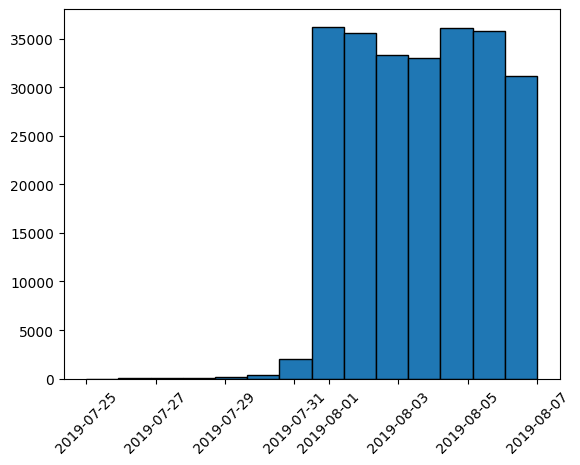

In [7]:
plt.hist(events['date'], bins=14, edgecolor='black')
plt.xticks(rotation=45)

#### ¿Hay seguridad de tener los datos completos para todo el periodo?

No hay seguridad, los datos de las fechas recolectadas no sirven sino hasta el 1 de Agosto del 2019, y el punto final es el 7 de Agosto del 2019, mostrando que la prueba lleva en cusro aproximadamente una semana bien colocada.

#### Momento en el que los datos se encuentran completos (colocar el verdadero periodo de representación de los datos)

El momento en el que los datos parecen encontrarse completos es desde 1 hasta el 7 de Agosto del 2019

<class 'pandas.core.frame.DataFrame'>
Index: 241298 entries, 2828 to 244125
Data columns (total 5 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   event_name  241298 non-null  object        
 1   user_id     241298 non-null  object        
 2   time        241298 non-null  datetime64[ns]
 3   group       241298 non-null  object        
 4   date        241298 non-null  datetime64[ns]
dtypes: datetime64[ns](2), object(3)
memory usage: 11.0+ MB


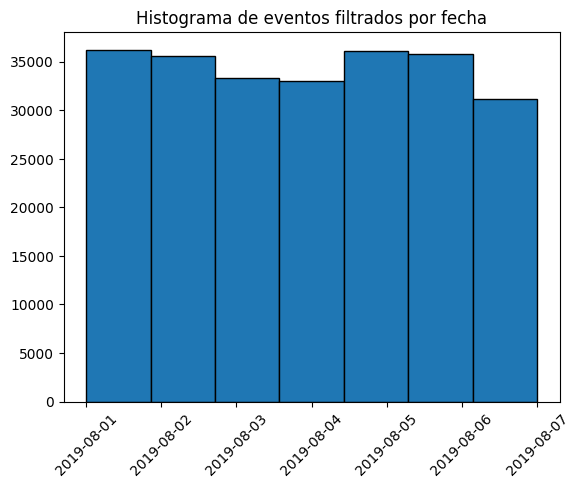

In [8]:
events_filtered = events[(events['date'] >= '2019-08-01') & (events['date'] <= '2019-08-07')]
plt.hist(events_filtered['date'], bins=7, edgecolor='black')
plt.xticks(rotation=45)
plt.title('Histograma de eventos filtrados por fecha')

events_filtered.info()

## ¿Se perdieron muchos datos o pocos?

Realmente se perdieron pocos datos, de los que empezaron a ahora, se empezaron con 244,126 elementos y ahora tenemos 241,298, restando un total de 2,828 datos, de los 244,126 que se tenían en un inicio.

## ¿Tenemos los usuarios para cada grupo?

In [9]:
user_number_filtered = events_filtered['user_id'].nunique()
print(f"El número de usuarios en los registros filtrados es: {user_number_filtered}")

El número de usuarios en los registros filtrados es: 7534


#### Conclusión

Similar a lo que vimos con la perdida de a penas 2,828 datos de 244,126 aquí se puerden solo 17 usuarios de los 7,551 que existían en total.

# Embudo de eventos

## Ordenación de eventos por frecuencia

([0, 1, 2, 3, 4],
 [Text(0, 0, 'MainScreenAppear'),
  Text(1, 0, 'OffersScreenAppear'),
  Text(2, 0, 'CartScreenAppear'),
  Text(3, 0, 'PaymentScreenSuccessful'),
  Text(4, 0, 'Tutorial')])

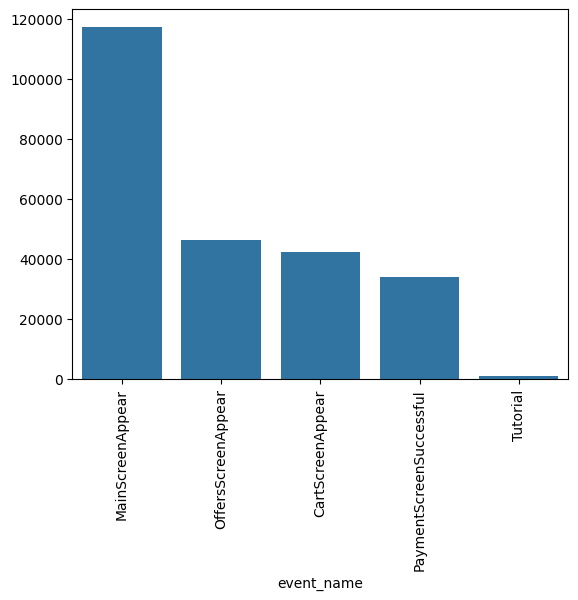

In [10]:
frecuencias = events_filtered['event_name'].value_counts()
frecuencias = frecuencias.sort_values(ascending=False)
sns.barplot(x=frecuencias.index, y=frecuencias.values)
plt.xticks(rotation=90)

## Ordenación de eventos por número de usuarios y su proporción

In [11]:
user_per_event = events_filtered.groupby('event_name')['user_id'].nunique().reset_index()
user_per_event.columns = ['event_name', 'user_count']
user_per_event = user_per_event.sort_values(by='user_count', ascending=False)
user_per_event.head()

,event_name,user_count
1,MainScreenAppear,7419
2,OffersScreenAppear,4593
0,CartScreenAppear,3734
3,PaymentScreenSuccessful,3539
4,Tutorial,840


## Orden supuesto en el que suceden las acciones

Supuestamente, y si solamente nos basamos por el embudo el orden es el siguiente:

-Main Screan
-Off Screan
-Cart Screan
-Payment Screan
-Tutorial

Claro que si lo pensamos un poco, el último paso es ilógico, por lo que valdría la pena saber si la página tiene un tutorial opcional que coloque para usuarios nuevos, o en qué condicional aparece este tutorial, porque no es parte natural del proceso al parecer, ya que si lo fuera tendría que coincidir su frecuencia exactamente con el número de usuarios, cosa que no es cierta. Así que el proceso real quedaría como:

1.-Main Screan
2.-Off Screan
3.-Cart Screan
4.-Payment Screan

Opcional: Tutorial

Otra cosa curiosa que valdría la pena analizar, es que los "Main Screan Appear" son menores al número de usuarios que tenemos, por lo que puede que algunos se hayan quedado en el tutorial.


## Proporción de usuarios que pasaron de etapa A a B a C sucesivamente

In [12]:
users_step_1 = events_filtered[events_filtered['event_name'] == 'MainScreenAppear']['user_id'].nunique()
users_step_2 = events_filtered[events_filtered['event_name'] == 'OffersScreenAppear']['user_id'].nunique()
users_step_3 = events_filtered[events_filtered['event_name'] == 'CartScreenAppear']['user_id'].nunique()
users_step_4 = events_filtered[events_filtered['event_name'] == 'PaymentScreenSuccessful']['user_id'].nunique()

proporcion_s1_s2 = users_step_2 / users_step_1
proporcion_s2_s3 = users_step_3 / users_step_2
proporcion_s3_s4 = users_step_4 / users_step_3
proporcion_s1_s4 = users_step_4 / users_step_1

print(f"Proporción de usuarios del paso 1 al paso 2: {proporcion_s1_s2:.2f}")
print(f"Proporción de usuarios del paso 2 al paso 3: {proporcion_s2_s3:.2f}")
print(f"Proporción de usuarios del paso 3 al paso 4: {proporcion_s3_s4:.2f}")
print(f"Proporción de usuarios del paso 1 al paso 4: {proporcion_s1_s4:.2f}")

Proporción de usuarios del paso 1 al paso 2: 0.62
Proporción de usuarios del paso 2 al paso 3: 0.81
Proporción de usuarios del paso 3 al paso 4: 0.95
Proporción de usuarios del paso 1 al paso 4: 0.48


## Etapa en la que se pierden más usuarios y Porcentaje de usuarios que hacen su viaje de principio a fin

Lo que podemos ver es que en la etapa que pierde más usuarios es del paso 1 al 2 proporcionalmente, y totalmente.

Podemos ver que realmente casi el 50% de los usuarios que entran compran, lo que son datos muy buenos, valdría la pena ver los datos de rentabilidad con el margen.

# Estudio de los resultados

## Cuantos usuarios hay en cada grupo

In [13]:
user_per_group = events_filtered.groupby('group')['user_id'].nunique()
user_per_group = user_per_group.reset_index()
user_per_group.columns = ['group', 'user_count']
print(user_per_group)

  group  user_count
0    A1        2484
1    A2        2513
2     B        2537


## Revisión de diferencia estadística entre grupo A1 y A2

In [14]:
a1 = events_filtered[events_filtered['group'] == 'A1']
a2 = events_filtered[events_filtered['group'] == 'A2']


## Evento más popular por grupo de control

### Cantidad de usuarios que lo realizaron y proporción 

([0, 1, 2, 3, 4],
 [Text(0, 0, 'MainScreenAppear'),
  Text(1, 0, 'OffersScreenAppear'),
  Text(2, 0, 'CartScreenAppear'),
  Text(3, 0, 'PaymentScreenSuccessful'),
  Text(4, 0, 'Tutorial')])

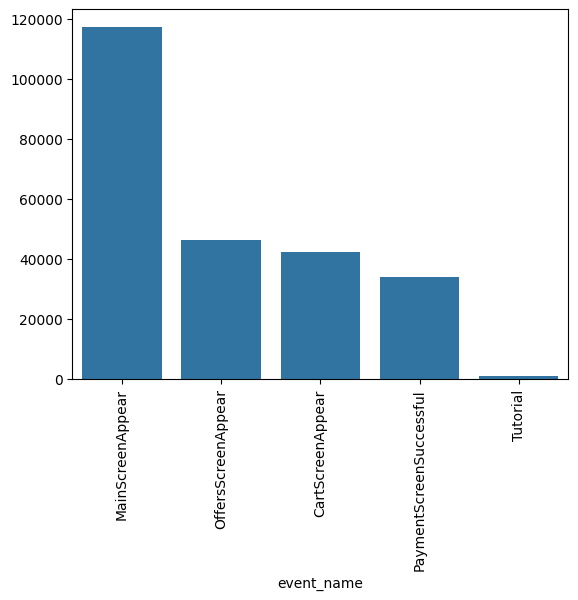

In [15]:
frec_a1 = a1['event_name'].value_counts()
frec_a1 = frec_a1.sort_values(ascending=False)
sns.barplot(x=frecuencias.index, y=frecuencias.values)
plt.xticks(rotation=90)

([0, 1, 2, 3, 4],
 [Text(0, 0, 'MainScreenAppear'),
  Text(1, 0, 'OffersScreenAppear'),
  Text(2, 0, 'CartScreenAppear'),
  Text(3, 0, 'PaymentScreenSuccessful'),
  Text(4, 0, 'Tutorial')])

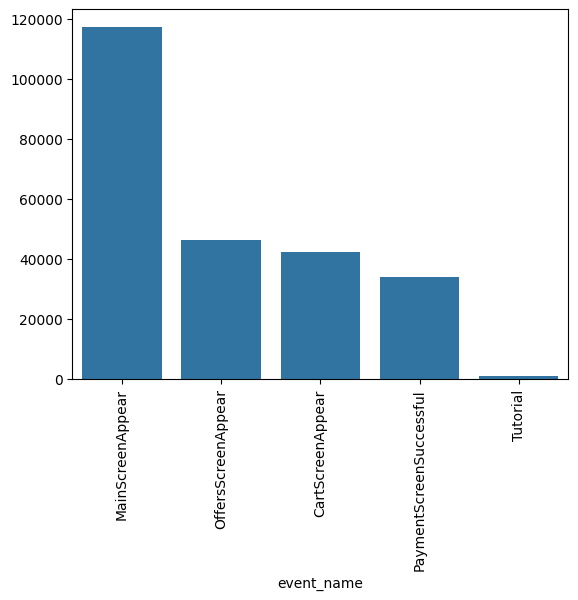

In [16]:
frec_a2 = a2['event_name'].value_counts()
frec_a2 = frec_a1.sort_values(ascending=False)
sns.barplot(x=frecuencias.index, y=frecuencias.values)
plt.xticks(rotation=90)

## Comprobación de diferencia estadística en los grupos

### ¿Se puede confirmar que los grupos se dividieron correctamente?

In [20]:
print('{0:.3f}'.format(stats.mannwhitneyu(frec_a1, frec_a2, alternative='two-sided').pvalue))

1.000


## Evento más popular de grupo B comparado con A

### Cantidad de usuarios que lo realizaron y proporción

([0, 1, 2, 3, 4],
 [Text(0, 0, 'MainScreenAppear'),
  Text(1, 0, 'OffersScreenAppear'),
  Text(2, 0, 'CartScreenAppear'),
  Text(3, 0, 'PaymentScreenSuccessful'),
  Text(4, 0, 'Tutorial')])

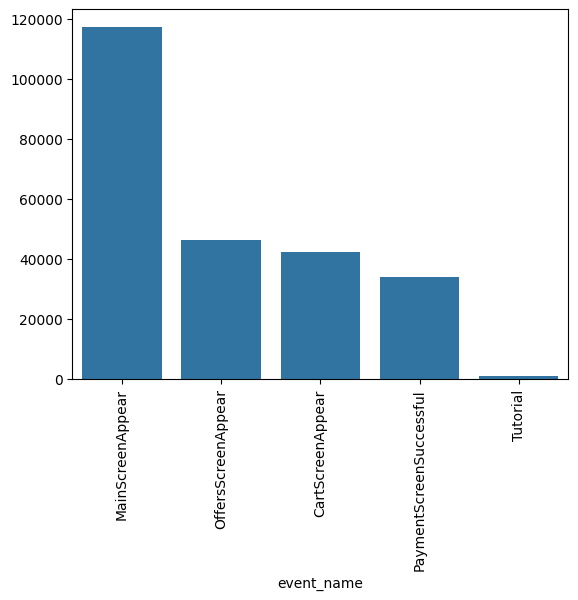

In [18]:
b = events_filtered[events_filtered['group'] == 'B']
frec_b = b['event_name'].value_counts()
frec_b = frec_a1.sort_values(ascending=False)
sns.barplot(x=frecuencias.index, y=frecuencias.values)
plt.xticks(rotation=90)

## Comprobación de diferencia estadística en los grupos A y B

In [21]:
print('{0:.3f}'.format(stats.mannwhitneyu(frec_a1, frec_b, alternative='two-sided').pvalue))

1.000


#### Conclusiones generales del experimento

Las pruebas muestran que aunque se haya hecho algo diferente con el grupo B no hay ninguna evidencia para creer que el gurpo tuvo algún cambio de comportamiento, esto se puede deber a dos cosas, el hecho de que apenas lleve una semana el experimetno, o que verdaderamente no tenga ningún efecto a los datos el cambio realizado.

Personalmente, si la diferencia es tan poca seguiría el experimento una o dos semanas más, y revisaría si verdaderamente no hay cambios significativos, ya que hay momentos en los que se puede ver que por un experimento tan corto har realmente poca diferencia.

### Repetición de las pruebas anteriores pero con nivel de significancia 0.1

Dado que el valor p es 1 no vale la pena que hagamos la prueba con 0.1 sabiendo que la respuesta es que estadisticamente son practicamente iguales.